In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from numpy import random
from numpy import exp
from scipy.stats import norm

# Datos inciales del proyecto

In [2]:
mu=0.06
sigma=0.2
Desembolso=830000
tiempo=1.000712329
Rcont=0.048790164
Produccion=1332.808
Tasa_inflacion=0.03

#Neutral Risk
Tasa_descuento= 0.05
#Proyecto real
Tasa_descuento=0.1

In [3]:
costes=np.array([61835,20584,20584,20584,20584,20584,20584,20584,20584,61835,20584,20584,20584,20584,20584,20584,20584,20584,20584,61835,20584,20584,20584,20584,140602,41251,41251,41251,41251,82502,41251,41251,41251,41251,41251,41251,41251,41251,41251,685663,41251,41251,41251,41251,41251,41251,41251,41251,41251,82502])

   ## Fuente de incertidumbre:

In [4]:
S0=72.503
Trayectorias=500000

**1. GWM Simulacion**

In [5]:
def Geo_Brow(Trayectorias):
    #random.seed(10)
    Precio_simulacion=np.zeros([Trayectorias,56],dtype='float32')
    Uniform = np.random.uniform(0,1,[Trayectorias,56])
    Z=norm.ppf(Uniform).astype('float32')
    
    for i in range(0,Trayectorias):
        Precio_simulacion[i,0]=S0
        for j in range(1,56):
                Precio_simulacion[i,j]=Precio_simulacion[i,j-1]*exp((Rcont-mu-0.5*sigma*sigma)*tiempo+sigma*Z[i,j-1]*(tiempo**0.5))    
   
    pd.DataFrame(Precio_simulacion).to_csv('Precio_GMW.txt', index=False,header=False)
    #pd.DataFrame(Uniform).to_csv('Uniform.txt', index=False,header=False)
    #pd.DataFrame(Z).to_csv('Z.txt', index=False,header=False)
    return 

In [6]:
Geo_Brow(Trayectorias)

In [7]:
Precio=pd.read_csv('Precio_GMW.txt',header=None )
Precio.head(30)

0          1           2           3           4           5   \
0   72.503  82.824104   83.065475   97.278770   85.055730   77.742690   
1   72.503  71.799706   48.534570   45.494260   56.471878   52.230250   
2   72.503  95.054665   65.147606   80.031550   77.049240   90.144380   
3   72.503  75.124690  106.283430  102.052730  120.264000  105.380190   
4   72.503  76.652070   70.139640   80.854996   66.566986   67.145260   
5   72.503  91.273120   67.397800   86.244490   79.846450   58.389220   
6   72.503  59.851710   56.844906   50.729280   56.640743   44.366356   
7   72.503  58.684640   54.517700   39.226357   40.682970   35.309470   
8   72.503  87.298600  115.619140  128.612000   96.784970   83.410560   
9   72.503  68.830620  105.671745   94.365036   85.686840   66.878610   
10  72.503  77.594635   74.923904   91.650024   79.280330   69.436490   
11  72.503  71.701910  120.644370  105.885480  120.046070  184.086100   
12  72.503  77.654200   67.043210   68.516525   69.002950   55.837930   
13  72.503  59.242653   73.388010   62.932490   75.665940   49.065094   
14  72.503  48.263050   41.501175   42.507820   49.213863   40.462753   
15  72.503  68.992455   57.478760   84.789680   62.933033   60.649445   
16  72.503  68.049550   61.849903   62.576500   42.313570   51.448690   
17  72.503  88.586390  117.636110   83.861370   80.181250   64.189514   
18  72.503  77.924590   85.513850   97.252560   78.484886   98.581260   
19  72.503  74.817276   52.511240   53.901510   51.742775   50.675262   
20  72.503  60.687576   67.002630   74.182690   69.741340   65.283700   
21  72.503  63.376020   66.916680   61.414160   68.323520   56.416264   
22  72.503  65.515144   54.843502   80.789820   72.632110   68.425385   
23  72.503  92.996270  100.998600  124.766785   97.373780   77.134834   
24  72.503  73.984960   79.399540   76.639700   87.417114   85.308920   
25  72.503  96.614200   82.499000   77.037520   68.151370   47.216270   
26  72.503  64.481930   91.481720  110.001010   96.422630   77.901470   
27  72.503  69.176960   60.299316   48.964700   41.828190   44.747550   
28  72.503  44.522940   42.229820   39.987130   40.507137   53.307743   
29  72.503  64.417540   59.797165   49.683666   50.117546   54.504600   

            6           7           8           9   ...           46  \
0    62.613388   64.651220   56.684980   47.993332  ...    16.585884   
1    50.741226   51.432823   52.168488   55.650517  ...    17.328627   
2   108.588875  108.709730  111.485825   81.338100  ...    40.743073   
3   121.642650  148.230830  105.746910  102.014390  ...    51.997520   
4    56.809467   58.243725   62.614580   80.735640  ...  1367.836200   
5    53.596320   45.014090   54.898273   46.675053  ...     8.894549   
6    37.575840   39.963430   27.669462   26.101044  ...    18.866910   
7    37.449560   35.728443   41.906730   41.207874  ...    62.397650   
8    57.411343   71.578490   60.881145   74.491630  ...    11.632319   
9    82.576880   58.483097   45.260284   38.661945  ...     0.699083   
10   73.426760   80.573690  100.453420  130.290370  ...   241.820620   
11  139.297600  140.412930  183.657200  184.903730  ...    26.088526   
12   72.318740   63.392067   58.662310   56.224968  ...    14.555581   
13   57.343834   47.518120   40.832577   28.155680  ...     2.209455   
14   36.416744   48.586212   77.974220   68.125470  ...    48.304882   
15   55.022200   55.741493   63.102085   44.917664  ...   162.178180   
16   57.235220   42.195442   51.669678   48.206524  ...     2.199629   
17   33.813583   26.824661   20.792982   25.783949  ...    18.567130   
18   74.923485   76.960220  115.941635   98.804756  ...     1.746024   
19   37.396793   34.051453   38.662968   44.814600  ...    18.146887   
20   81.814460   67.546500   62.355230   84.232285  ...     3.118818   
21   76.872410   56.390420   83.078250   66.916210  ...    25.873627   
22   72.915750   69.922900   66.020000   80.734460  ...    98.964516   
23   81.036896  

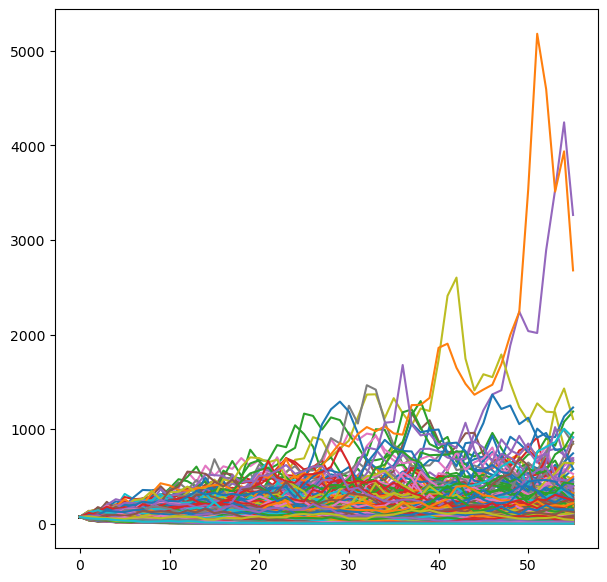

In [8]:
N_Trayectorias=3000
b=np.zeros((N_Trayectorias,56))
for i in range(N_Trayectorias):
    for j in range(56):
        b[i,j]=Precio.loc[i,j]
t=np.arange(0,56,1)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)    
_=ax.plot(t, b.T)

# Van Tradicional:

In [9]:
def VAN_Ejercicio(Precio,Año,Size=len(Precio)):
    VAN_Ejercicio=np.zeros([len(Precio),1],dtype='float64')
    for i in range(0,Size):
        Precio_simulado=Precio.loc[i]
        for j in range(1+Año,51+Año):
            VAN_Ejercicio[i,0]=(Precio_simulado[j]*Produccion-costes[j-1-Año])*(1.05**(-j+Año))*(1.03**(j-Año))+VAN_Ejercicio[i,0]
        VAN_Ejercicio[i,0]=VAN_Ejercicio[i,0]-Desembolso
    return VAN_Ejercicio

In [10]:
Numero_periodos=6
#Calculo VAN EJERCICIO
VAN_Ejer=np.zeros([len(Precio),1],dtype='float64')

for i in range(0, Numero_periodos):
    Salida=VAN_Ejercicio(Precio,i)
    VAN_Ejer=np.hstack( (VAN_Ejer, Salida ))


#Creo Data Frame VAN EJERCICIO y nombro columnas
VAN_Ejer=np.delete(VAN_Ejer, 0, axis = 1)
VAN_Ejer=pd.DataFrame(VAN_Ejer)

Name=['VAN_Tradicional']
for i in range(1,Numero_periodos):
    Name.append("VAN_Ejercicio_Año_"+str(i))
VAN_Ejer.columns=Name

#Creo Data Frame PRECIO FUENTE INCERTIDUMBRE y nombro columnas
Data=pd.DataFrame(Precio[range(1,6)])
Name=[]
for i in range(1,Numero_periodos):
    Name.append("Precio_"+str(i))
Data.columns=Name

Data=pd.concat([Data, VAN_Ejer], axis=1)

Data.to_csv('Data.txt',index=False)

In [11]:
Data=pd.read_csv('Data.txt')

In [12]:
Data.head()

Precio_1    Precio_2    Precio_3    Precio_4   Precio_5  VAN_Tradicional  \
0  82.824104   83.065475   97.278770   85.055730   77.74269    -1.980801e+05   
1  71.799706   48.534570   45.494260   56.471878   52.23025    -8.671178e+05   
2  95.054665   65.147606   80.031550   77.049240   90.14438     8.565765e+05   
3  75.124690  106.283430  102.052730  120.264000  105.38019     1.252149e+06   
4  76.652070   70.139640   80.854996   66.566986   67.14526     1.192153e+07   

   VAN_Ejercicio_Año_1  VAN_Ejercicio_Año_2  VAN_Ejercicio_Año_3  \
0        -2.633680e+05        -3.293315e+05        -4.166349e+05   
1        -9.279239e+05        -9.613312e+05        -9.914984e+05   
2         8.174510e+05         8.167765e+05         7.994340e+05   
3         1.237954e+06         1.180572e+06         1.125501e+06   
4         1.312218e+07         1.480141e+07         1.682389e+07   

   VAN_Ejercicio_Año_4  VAN_Ejercicio_Año_5  
0        -4.901038e+05        -5.548258e+05  
1        -1.034920e+06        -1.073834e+06  
2         7.800889e+05         7.528749e+05  
3         1.048409e+06         9.895834e+05  
4         1.926782e+07         2.125964e+07

In [13]:
Numero_periodos= 5


Variable_aux=np.zeros([len(Data),1])     

for i in range(len(Data)):
    if Data["VAN_Ejercicio_Año_5"][i]>0:
        Variable_aux[i]=Data["VAN_Ejercicio_Año_"+str(Numero_periodos)][i]/(1+Tasa_descuento)
    else:
        Variable_aux[i]=0
Valor_continuar=pd.DataFrame(np.zeros((len(Data),1)))
l=["Valor_Continuar_Año_5"]
Valor_continuar.columns=l
Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos-1)]=pd.DataFrame(Variable_aux)


#------------------------
#Valor_continuar.to_csv('Valor_continuar_5.txt',index=False)
#Data["VAN_Ejercicio_Año_5"].to_csv('VAN_Ejercicio_Año_5.txt',index=False)

In [14]:
for Numero_periodos in range(4,0,-1):
    #VARIABLE DEPENDIENTE
    Y=pd.DataFrame(Data["VAN_Ejercicio_Año_"+str(Numero_periodos)])
    Y.columns=["VAN_Ejercicio_Año_"+str(Numero_periodos)]


    #VARIABLE INDEPENDIENTE
    Precio2_año=pd.DataFrame(Data["Precio_"+str(Numero_periodos)]*Data["Precio_"+str(Numero_periodos)])
    Precio2_año.columns=["Precio^2_año"]

    Precio_año=pd.DataFrame(Data["Precio_"+str(Numero_periodos)])
    Precio_año.columns=["Precio_año"]


    #Columnas de 1s
    B0=pd.DataFrame(np.ones([len(Precio_año),1],dtype='float32'))
    B0.columns=["1s"]


    #DATA FRAME CON TODO
    Datos_Regresion=pd.concat([Y,B0,Precio_año,Precio2_año,Valor_continuar],axis=1)
    Datos_Regresion=pd.DataFrame(Datos_Regresion.loc[(Datos_Regresion["VAN_Ejercicio_Año_"+str(Numero_periodos)] >= 0)])

    l = []
    for i in range(len(Datos_Regresion)):
        l.append(str(i))

    Datos_Regresion.index =l

    #Genero los datos de la regresion Ax=b
    A=Datos_Regresion.iloc[:, [1,2,3]]
    b=pd.DataFrame(Datos_Regresion["VAN_Ejercicio_Año_"+str(Numero_periodos)]-Datos_Regresion["Valor_Continuar_Año_"+str(Numero_periodos)])
    b.columns=["Variable dependiente"]

    #SVD
    U,S,VT=np.linalg.svd(A,full_matrices=0)
    U,S,VT=np.linalg.svd(A,full_matrices=0)
    x0=VT.T@np.linalg.inv(np.diag(S))@U.T@b


    #Valores Ajustados
    A_ampliada=pd.concat([pd.DataFrame(np.ones([len(Precio_año),1],dtype='float32')),Data["Precio_"+str(Numero_periodos)],Data["Precio_"+str(Numero_periodos)]*Data["Precio_"+str(Numero_periodos)]],axis=1)
    Fit_value=np.dot(A_ampliada,x0)
    Fit_value

    Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos-1)]=0
    Variable_aux=np.zeros([len(Data),1])
    for i in range(len(Data)):
        if Fit_value[i]>0:
            Variable_aux[i]=Data["VAN_Ejercicio_Año_"+str(Numero_periodos)][i]/(1+Tasa_descuento)
        else:
            Variable_aux[i]=Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos)][i]/(1+Tasa_descuento)

    Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos-1)]=Variable_aux


    #------------------------
 
    #Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos-1)].to_csv('Valor_continuar.txt',index=False)
    #x0.to_csv('x0'+str(Numero_periodos)+'.txt',index=False)
    #A.to_csv('A'+str(Numero_periodos)+'.txt',index=False)
    #b.to_csv('b'+str(Numero_periodos)+'.txt',index=False)
    #Fit_value=pd.DataFrame(Fit_value)
    #Fit_value.to_csv('Fit_value'+str(Numero_periodos)+'.txt',index=False)
    #Valor_continuar["Valor_Continuar_Año_"+str(Numero_periodos-1)].to_csv('Valor_continuar'+str(Numero_periodos)+'.txt',index=False)
    #Data["VAN_Ejercicio_Año_"+str(Numero_periodos)].to_csv('VAN_Ejercicio_Año_'+str(Numero_periodos)+'.txt',index=False)

In [15]:
Resumen=pd.concat([Data, Valor_continuar], axis=1)
Resumen.to_csv('Resumen.txt',index=False)
Resumen.head(30)

Precio_1    Precio_2    Precio_3    Precio_4    Precio_5  \
0   82.824104   83.065475   97.278770   85.055730   77.742690   
1   71.799706   48.534570   45.494260   56.471878   52.230250   
2   95.054665   65.147606   80.031550   77.049240   90.144380   
3   75.124690  106.283430  102.052730  120.264000  105.380190   
4   76.652070   70.139640   80.854996   66.566986   67.145260   
5   91.273120   67.397800   86.244490   79.846450   58.389220   
6   59.851710   56.844906   50.729280   56.640743   44.366356   
7   58.684640   54.517700   39.226357   40.682970   35.309470   
8   87.298600  115.619140  128.612000   96.784970   83.410560   
9   68.830620  105.671745   94.365036   85.686840   66.878610   
10  77.594635   74.923904   91.650024   79.280330   69.436490   
11  71.701910  120.644370  105.885480  120.046070  184.086100   
12  77.654200   67.043210   68.516525   69.002950   55.837930   
13  59.242653   73.388010   62.932490   75.665940   49.065094   
14  48.263050   41.501175   42.507820   49.213863   40.462753   
15  68.992455   57.478760   84.789680   62.933033   60.649445   
16  68.049550   61.849903   62.576500   42.313570   51.448690   
17  88.586390  117.636110   83.861370   80.181250   64.189514   
18  77.924590   85.513850   97.252560   78.484886   98.581260   
19  74.817276   52.511240   53.901510   51.742775   50.675262   
20  60.687576   67.002630   74.182690   69.741340   65.283700   
21  63.376020   66.916680   61.414160   68.323520   56.416264   
22  65.515144   54.843502   80.789820   72.632110   68.425385   
23  92.996270  100.998600  124.766785   97.373780   77.134834   
24  73.984960   79.399540   76.639700   87.417114   85.308920   
25  96.614200   82.499000   77.037520   68.151370   47.216270   
26  64.481930   91.481720  110.001010   96.422630   77.901470   
27  69.176960   60.299316   48.964700   41.828190   44.747550   
28  44.522940   42.229820   39.987130   40.507137   53.307743   
29  64.417540   59.797165   49.683666   50.117546   54.504600   

    VAN_Tradicional  VAN_Ejercicio_Año_1  VAN_Ejercicio_Año_2  \
0     -1.980801e+05        -2.633680e+05        -3.293315e+05   
1     -8.671178e+05        -9.279239e+05        -9.613312e+05   
2      8.565765e+05         8.174510e+05         8.167765e+05   
3      1.252149e+06         1.237954e+06         1.180572e+06   
4      1.192153e+07         1.312218e+07         1.480141e+07   
5     -5.141263e+05        -5.974671e+05        -6.508991e+05   
6     -4.151686e+05        -4.458261e+05        -4.731265e+05   
7      5.912996e+05         5.950844e+05         6.111594e+05   
8     -5.953442e+05        -6.712009e+05        -7.867145e+05   
9     -1.281304e+06        -1.354007e+06        -1.477222e+06   
10     3.934539e+06         4.062724e+06         4.243107e+06   
11     1.812164e+06         1.805601e+06         1.734756e+06   
12    -4.632874e+05        -5.285378e+05        -5.815995e+05   
13    -1.404595e+06        -1.466844e+06        -1.549098e+06   
14    -3.416054e+05        -3.367793e+05        -3.257723e+05   
15     3.263296e+06         3.302517e+06         3.358879e+06   
16    -1.214660e+06        -1.284606e+06        -1.347692e+06   
17    -1.032211e+06        -1.117302e+06        -1.244097e+06   
18    -3.522045e+05        -4.183121e+05        -4.959084e+05   
19    -6.850332e+05        -7.465375e+05        -7.760844e+05   
20    -7.253757e+05        -7.746760e+05        -8.338728e+05   
21    -4.520269e+05        -4.892283e+05        -5.333431e+05   
22     4.957829e+05         4.915600e+05         4.970946e+05   
23    -3.080082e+05        -3.863840e+05        -4.776364e+05   
24    -6.004987e+05        -6.655412e+05        -7.384557e+05   
25    -7.028495e+05        -7.943797e+05        -8.701310e+05   
26    -5.387552e+05        -5.871217e+05        -6.726390e+05   
27    -9.264374e+05        -9.778714e+05        -1.018284e+06   
28    -1.017091e+06        -1.037152e+06        -1.057485e+06   
29    -1.464535e+05        -1.747937e+0

In [16]:
VAN_Trad=Resumen["VAN_Tradicional"].mean()
print(VAN_Trad)

192898.0557702412


In [17]:
VAN_LSM=Resumen["Valor_Continuar_Año_0"].mean()
print(VAN_LSM)

150602.62883078857


Todos los derechos reservados a Sergio González Velasco.